# K-nächste Nachbarn (K-nearest Neighbors)
Wir wenden den K-nächste-Nachbarn-Algorithmus auf den IRIS-Datensatz an.

In [106]:
# Wir laden den Datensatz
import pandas as pd
url = "https://raw.githubusercontent.com/troescherw/datasets/master/iris.csv"
iris = pd.read_csv(url, delimiter=";")
iris



,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species,SpeciesID
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [107]:
# Aufteilen in X und y
X = iris.iloc[:, :4]
y = iris.SpeciesID

In [108]:
# Aufteilen in Trainings- und Testdaten
# "Training" bedeutet hier das Erstellen einer Abstandsmatrix

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.3)

Wir erstellen das Modell und verwenden für k den Wert 5.

In [109]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)


Wir klassifizieren die Objekte aus dem Test-Datensatz.

In [110]:
pred = knn.predict(X_test)
pred

array([1, 1, 1, 0, 0, 0, 0, 1, 2, 2, 1, 0, 0, 0, 2, 2, 2, 2, 2, 1, 2, 0,
       1, 2, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 2, 0, 2, 2, 0,
       2])

Wir stellen das Ergebnis in einer Confusion Matrix dar und berechnen die Accuracy.

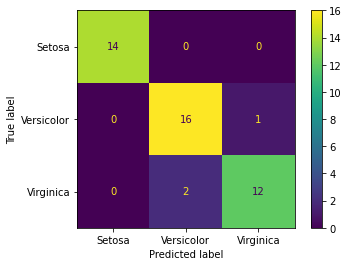

In [111]:
from sklearn.metrics import plot_confusion_matrix
import numpy as np

classes = ["Setosa", "Versicolor", "Virginica"]
_=plot_confusion_matrix(knn, X_test, y_test, display_labels=classes)



In [112]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.9333333333333333

## Optimierung des Algorithmus

Für die Zuordnung des Objektes zu einer Klasse gibt es mehrere Möglichkeiten: Im einfachsten Fall wird wie schon erwähnt eine schlichte Mehrheitsentscheidung getroffen, was aber nicht immer das beste Ergebnis liefert, insbesondere wenn sich ähnlich oder sogar gleich viele Objekte der jeweiligen Klasse in unmittelbarer Nachbarschaft befinden. Daher kann man altnernativ die Objekte in der Nachbarschaft gewichten: Je näher ein Objekt, desto mehr "Gewicht" erhält die jeweilige Klasse.

Dem Konstruktor der Klasse *KNeighborsClassifier* kann man deshalb noch das Attribut *weights* bestimmen. Standardmäßig ist dies auf *uniform* gesetzt, was der ersten, einfachen Methode entspricht. Man kann es aber auch auf den Wert *distance* setzen, dann werden die Abstände gewichtet.

Im folgenden Skript wollen wir nun anhand eines Datensatzes das optimale K und auch die optimale Gewichtung der Abstände bestimmen. Wir verwenden hierfür einen Datensatz aus dem *sklearn*-Package, der über chemische Analysedaten von Weinen verfügt. Jeder der 178 Weine stammt von einem von drei italienischen Winzern ("cultivator"). Wie gut kann unser Modell vorhersagen, von welchem Winzer der Wein stammt?

Um unser Modell zu optimieren werden wir ein K von 1 bis 10 verwenden und für jedes K ein unterschiedliches Verfahren für die Gewichtung verwenden. Es werden also insgesamt 20 Modelle durchprobiert und für jedes ermitteln wir die Accuracy. Die Kombination aus K und dem Typ für die Gewichtung mit der höchsten Accuracy liefert (vermutlich) die besten Hyperparameter.

In [44]:
# Laden des Datensatzes
from sklearn.datasets import load_wine

wines = load_wine()
print(wines.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [45]:
# Aufteilen in Trainings- und Testdaten
# "Training" bedeutet hier das Erstellen einer Abstandsmatrix

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wines.data, wines.target, shuffle=True, test_size=0.3, random_state=23 )

In [46]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np


weights = ["uniform", "distance"]
ks = np.arange(1,10)

knn = KNeighborsClassifier(n_neighbors=k, weights=weight).fit(X_train, y_train)
pred = knn.predict(X_test)
    
for weight in weights:
    for k in ks:
        knn = KNeighborsClassifier(n_neighbors=k, weights=weight).fit(X_train, y_train)
        print(f"K={k}, weights={weight}, Accuracy = {knn.score(X_test, y_test):.3}")
        

K=1, weights=uniform, Accuracy = 0.796
K=2, weights=uniform, Accuracy = 0.685
K=3, weights=uniform, Accuracy = 0.704
K=4, weights=uniform, Accuracy = 0.648
K=5, weights=uniform, Accuracy = 0.648
K=6, weights=uniform, Accuracy = 0.704
K=7, weights=uniform, Accuracy = 0.667
K=8, weights=uniform, Accuracy = 0.685
K=9, weights=uniform, Accuracy = 0.648
K=1, weights=distance, Accuracy = 0.796
K=2, weights=distance, Accuracy = 0.796
K=3, weights=distance, Accuracy = 0.759
K=4, weights=distance, Accuracy = 0.722
K=5, weights=distance, Accuracy = 0.722
K=6, weights=distance, Accuracy = 0.685
K=7, weights=distance, Accuracy = 0.722
K=8, weights=distance, Accuracy = 0.722
K=9, weights=distance, Accuracy = 0.759
